In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [427]:
df = pd.read_csv("adult_data.csv")
df.columns = ['age','workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation',
             'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'salary']

In [428]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'salary'],
      dtype='object')

In [429]:
df.shape

(32561, 15)

In [430]:
df.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [431]:
def handle_capital_gain(df):
    df['capital_gain'] = np.where(df['capital_gain'] == 0, np.nan, df['capital_gain'])
    df['capital_gain'] = np.log(df['capital_gain'])
    df['capital_gain'] = df['capital_gain'].replace(np.nan, 0)

In [432]:
handle_capital_gain(df)

In [433]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,7.684324,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0,40,Cuba,<=50K


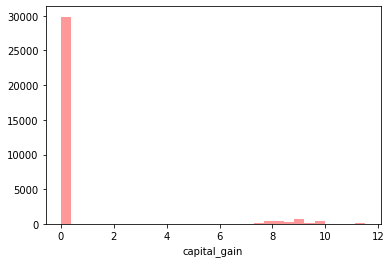

In [434]:
sns.distplot(df["capital_gain"], kde=False,color ='red', bins = 30)

In [435]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,0.734601,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,2.454680,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,11.512915,4356.000000,99.000000


In [436]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
salary            0
dtype: int64

In [437]:
df['salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

## Removing Outliers From Hours Per Week

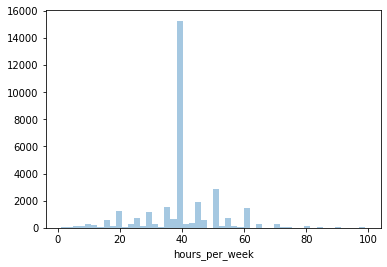

In [438]:
sns.distplot(df['hours_per_week'], kde=False)

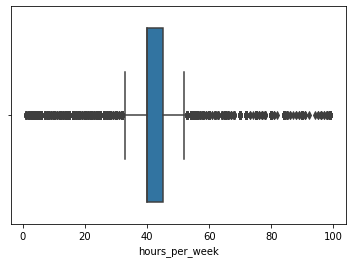

In [439]:
sns.boxplot(df['hours_per_week'])

In [440]:
def remove_outlier_hours_per_week(df):
    IQR = df['hours_per_week'].quantile(0.75) - df['hours_per_week'].quantile(0.25)
    
    lower_range = df['hours_per_week'].quantile(0.25) - (1.5 * IQR)
    upper_range = df['hours_per_week'].quantile(0.75) + (1.5 * IQR)
    
    df.loc[df['hours_per_week'] <= lower_range, 'hours_per_week'] = lower_range
    df.loc[df['hours_per_week'] >= upper_range, 'hours_per_week'] = upper_range

In [441]:
remove_outlier_hours_per_week(df)

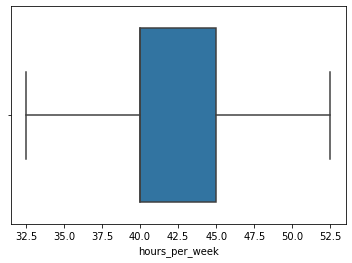

In [442]:
sns.boxplot(df['hours_per_week'])

## Removing Outliers From Education Number

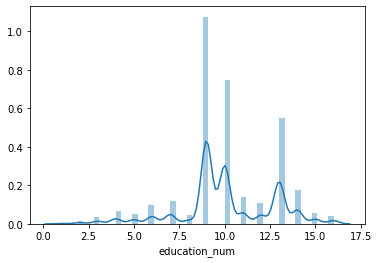

In [443]:
sns.distplot(df['education_num'])

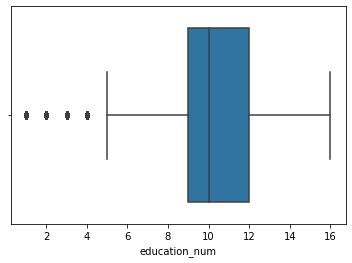

In [444]:
sns.boxplot(df['education_num'])

In [445]:
def remove_outlier_education_num(df):
    IQR = df['education_num'].quantile(0.75) - df['education_num'].quantile(0.25)
    
    lower_range = df['education_num'].quantile(0.25) - (1.5 * IQR)
    upper_range = df['education_num'].quantile(0.75) + (1.5 * IQR)
    
    df.loc[df['education_num'] <= lower_range, 'education_num'] = lower_range
    df.loc[df['education_num'] >= upper_range, 'education_num'] = upper_range

In [446]:
remove_outlier_education_num(df)

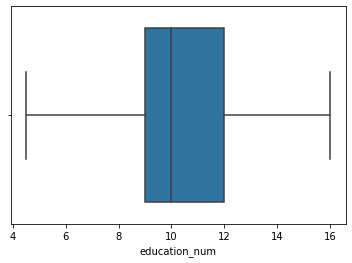

In [447]:
sns.boxplot(df['education_num'])

In [454]:
def feature_engineering(df):
    
    ## convert the salary into 1 if salary is greater then 50K else 0
     #df['salary'] = df['salary'].replace(' >50K', '>50K')
    df['salary'] = np.where(df['salary'] == " >50K", 1, 0)
    
    ## convert the sex column into 0 and 1, if male then 1 else 0
    df['sex'] = np.where(df['sex'] == " Male", 1, 0)
     
    ## do the label encoding in race column (0: 'White',1: 'Black',2: 'Asian-Pac-Islander',3:'Amer-Indian-Eskimo',4:'Other')
    label_enco_race = {value: key for key, value in enumerate(df['race'].unique())}
    df['race'] = df['race'].map(label_enco_race)
    
    ## {0: ' Not-in-family',1: ' Husband'2: ' Wife',3: ' Own-child',4: ' Unmarried',5: ' Other-relative
    label_enco_relation = {value: key for key, value in enumerate(df['relationship'].unique())}
    df['relationship'] = df['relationship'].map(label_enco_relation)
    
    ## {0: ' Adm-clerical',1: ' Exec-managerial',2: ' Handlers-cleaners',3: ' Prof-specialty',4: ' Other-service',5: ' Sales', 6: ' Craft-repair',7: ' Transport-moving',8: ' Farming-fishing',9: ' Machine-op-inspct', 10: ' Tech-support', 11: ' ?',12: ' Protective-serv',13: ' Armed-Forces', 14: ' Priv-house-serv'}
    df['occupation'] = np.where(df['occupation'] == ' ?', 'Missing', df['occupation'])
    label_enco_occu = {value: key for key, value in enumerate(df['occupation'].unique())}
    ## Replacing ? value with 'Missing'
    df['occupation'] = df['occupation'].map(label_enco_occu)
    
    ## {0: ' Never-married',1: ' Married-civ-spouse',2: ' Divorced',3: ' Married-spouse-absent',4: ' Separated',5: ' Married-AF-spouse',6: ' Widowed'}
    label_enco_marital_status = {value: key for key, value in enumerate(df['marital_status'].unique())}
    df['marital_status'] = df['marital_status'].map(label_enco_marital_status)
    
    label_enco_edu = {value: key for key, value in enumerate(df['education'].unique())}
    df['education'] = df['education'].map(label_enco_edu)
    
    ## {0: ' State-gov'1: ' Self-emp-not-inc',2: ' Private',3: ' Federal-gov',4: ' Local-gov',5: ' ?',6: ' Self-emp-inc',7: ' Without-pay',8: ' Never-worked'}
    df['workclass'] = np.where(df['workclass'] == ' ?', 'Missing', df['workclass'])
    label_enco_workclass = {value: key for key, value in enumerate(df['workclass'].unique())}
    df['workclass'] = df['workclass'].map(label_enco_workclass)
    
    ## {' United-States': 0,' Cuba': 1,' Jamaica': 2,' India': 3,' ?': 4,' Mexico': 5,' South': 6,' Puerto-Rico': 7,' Honduras': 8,' England': 9,' Canada': 10,' Germany': 11,' Iran': 12,' Philippines': 13,' Italy': 14,' Poland': 15,' Columbia': 16,' Cambodia': 17,' Thailand': 18,' Ecuador': 19,' Laos': 20,' Taiwan': 21,' Haiti': 22,' Portugal': 23,' Dominican-Republic': 24,' El-Salvador': 25,' France': 26,' Guatemala': 27,' China': 28,' Japan': 29,' Yugoslavia': 30,' Peru': 31,' Outlying-US(Guam-USVI-etc)': 32,' Scotland': 33,' Trinadad&Tobago': 34,' Greece': 35,' Nicaragua': 36,' Vietnam': 37,' Hong': 38,' Ireland': 39,' Hungary': 40,' Holand-Netherlands': 41
    df['native_country'] = np.where(df['native_country'] == ' ?', 'Missing', df['native_country'])
    label_enco_workclass = {value: key for key, value in enumerate(df['native_country'].unique())}
    df['native_country'] = df['native_country'].map(label_enco_workclass)

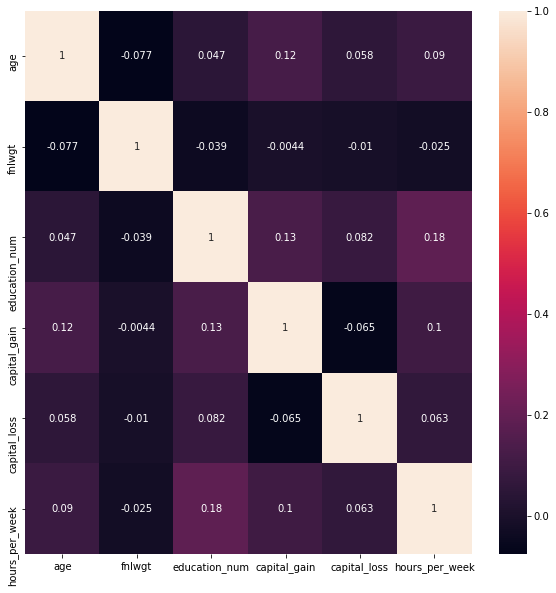

In [455]:
plt.figure(figsize=(10, 10))
corr = df.corr()
sns.heatmap(corr, annot=True)

In [456]:
df = df.drop('fnlwgt', axis=1)

In [457]:
df.isnull().sum()

age               0
workclass         0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
salary            0
dtype: int64

In [458]:
df.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,7.684324,0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0,32.5,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0,40.0,Cuba,<=50K


## After Feature Engineering

In [459]:
feature_engineering(df)

In [460]:
df.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,0,0,13.0,0,0,0,0,1,7.684324,0,40.0,0,0
1,50,1,0,13.0,1,1,1,0,1,0.000000,0,32.5,0,0
2,38,2,1,9.0,2,2,0,0,1,0.000000,0,40.0,0,0
3,53,2,2,7.0,1,2,1,1,1,0.000000,0,40.0,0,0
4,28,2,0,13.0,1,3,2,1,0,0.000000,0,40.0,1,0


## Train_test_split

In [461]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [462]:
sc = StandardScaler()

In [463]:
X = df[['age', 'workclass', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 
          'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country']]

In [464]:
y = df['salary']

In [465]:
y.value_counts()

0    24720
1     7841
Name: salary, dtype: int64

In [466]:
X = sc.fit_transform(X)

In [467]:
X

array([[ 0.03067056, -1.88460023, -0.99158435, ..., -0.21665953,
        -0.194354  , -0.25574647],
       [ 0.83710898, -1.0687461 , -0.99158435, ..., -0.21665953,
        -1.40659071, -0.25574647],
       [-0.04264203, -0.25289198, -0.70202542, ..., -0.21665953,
        -0.194354  , -0.25574647],
       ...,
       [ 1.42360965, -0.25289198, -0.70202542, ..., -0.21665953,
        -0.194354  , -0.25574647],
       [-1.21564337, -0.25289198, -0.70202542, ..., -0.21665953,
        -1.40659071, -0.25574647],
       [ 0.98373415,  3.01052452, -0.70202542, ..., -0.21665953,
        -0.194354  , -0.25574647]])

In [470]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [472]:
print("Train data shape: {}".format(X_train.shape))
print("Test data shape: {}".format(X_test.shape))

Train data shape: (26048, 13)
Test data shape: (6513, 13)


In [473]:
from sklearn.linear_model import LogisticRegression

In [474]:
lg_model = LogisticRegression()

In [475]:
lg_model.fit(X_train, y_train)

LogisticRegression()

In [476]:
y_pred = lg_model.predict(X_test)

In [477]:
result = {
    'Actual': y_test,
    'Predicted': y_pred
}

In [479]:
pd.DataFrame(result)

,Actual,Predicted
14160,0,0
27048,0,0
28868,1,0
5667,0,0
7827,0,1
...,...,...
1338,0,1
24534,1,0
18080,1,1
10354,0,0


In [480]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [481]:
print("Accuracy Score: {}".format(accuracy_score(y_test, y_pred)))
print("Confusion Matrix:\n {}".format(confusion_matrix(y_test, y_pred)))
print("Classification Report:\n {}".format(classification_report(y_test, y_pred)))

Accuracy Score: 0.822201750345463
Confusion Matrix:
 [[4626  316]
 [ 842  729]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.94      0.89      4942
           1       0.70      0.46      0.56      1571

    accuracy                           0.82      6513
   macro avg       0.77      0.70      0.72      6513
weighted avg       0.81      0.82      0.81      6513

